In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
data =sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
data.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [4]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [10]:
print(data.religious.value_counts() ,"\n",data.rate_marriage.value_counts(),"\n",data.religious.value_counts(),"\n",data.educ.value_counts(),"\n",data.occupation.value_counts(),"\n",data.occupation_husb.value_counts())

3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64 
 5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64 
 3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64 
 14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64 
 3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64 
 4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64


In [11]:
#add "affair" column: 1 represents having affairs, 0 represents not 

data['affair'] = (data.affairs >0).astype(int)

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',data, return_type="dataframe")
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [12]:
y=pd.DataFrame(y,columns=['affair'])

In [13]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [14]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [144]:
y.affair.value_counts()

0.0    4313
1.0    2053
Name: affair, dtype: int64

In [43]:
data.iloc[:,1]

0       32.0
1       27.0
2       22.0
3       37.0
4       27.0
        ... 
6361    32.0
6362    32.0
6363    22.0
6364    32.0
6365    22.0
Name: age, Length: 6366, dtype: float64

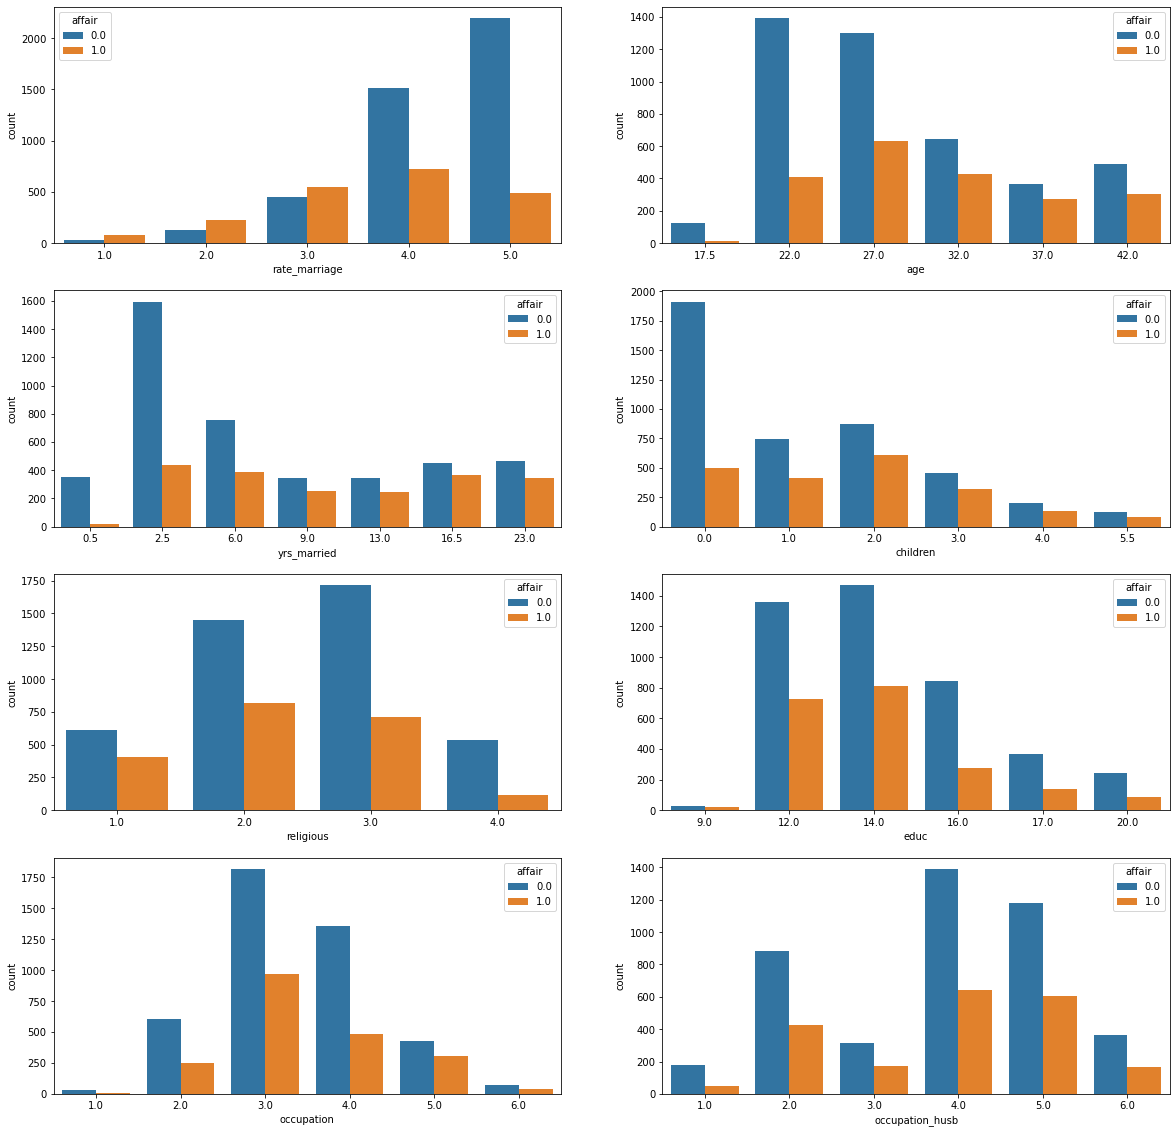

In [61]:
import seaborn as sns
fig,ax=plt.subplots(4,2,figsize=(20,20))
a=0
b=0
for i in range(data.shape[1]-2):
    if b==2:
        b=0
        a+=1 
    sns.countplot(data.iloc[:,i],hue=y.affair,ax=ax[a,b])
    b+=1

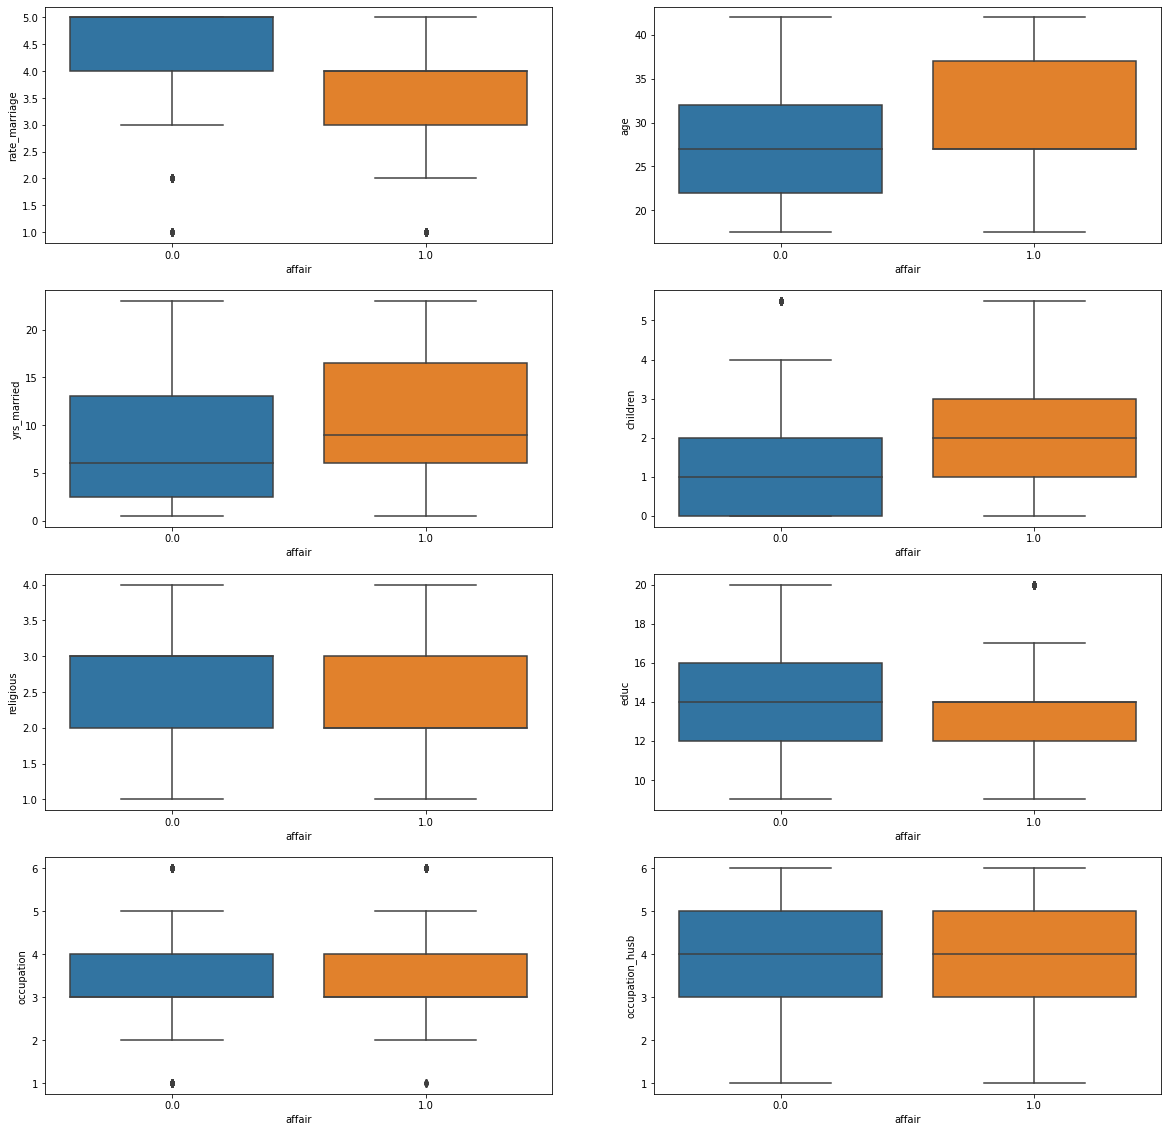

In [64]:
import seaborn as sns
fig,ax=plt.subplots(4,2,figsize=(20,20))
a=0
b=0
for i in range(data.shape[1]-2):
    if b==2:
        b=0
        a+=1 
    sns.boxplot(y=data.iloc[:,i],x=y.affair,ax=ax[a,b])
    b+=1

In [88]:
from collections import Counter
Counter(y.affair)

Counter({1.0: 2053, 0.0: 4313})

In [188]:
y = np.ravel(y)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,roc_curve,roc_auc_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

model1=LogisticRegression(max_iter=100,C=0.01)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=1)
n_scores=cross_val_score(model1,X,y,scoring='precision',cv=cv,n_jobs=-1)
print("Precision cv : ",np.mean(n_scores))
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred1))
print("AUC :",roc_auc_score(y_test,y_pred1))

Precision cv :  0.6321343045755874
Accuracy : 0.7277486910994765
AUC : 0.6247447047899114


In [190]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_smote,y_smote=smote.fit_resample(X,y)
pd.DataFrame(y_smote,columns=['affair']).affair.value_counts()

0.0    4313
1.0    4313
Name: affair, dtype: int64

In [191]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.3,random_state=1)

model2=LogisticRegression(max_iter=100,C=0.01,class_weight='balanced')
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=1)
n_scores=cross_val_score(model2,X_smote,y_smote,scoring='precision',cv=cv,n_jobs=-1)
print("Precision cv : ",np.mean(n_scores))
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print("accuracy :",accuracy_score(y_test,y_pred2))
print("AUC :",roc_auc_score(y_test,y_pred2))

Precision cv :  0.6905515198882699
accuracy : 0.6897217928902627
AUC : 0.6891108769775955


In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

model3=LogisticRegression(max_iter=100,C=0.01,class_weight='balanced')
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=1)
n_scores=cross_val_score(model3,X,y,scoring='precision',cv=cv,n_jobs=-1)
print("Precision cv : ",np.mean(n_scores))
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
print("accuracy :",accuracy_score(y_test,y_pred3))
print("AUC :",roc_auc_score(y_test,y_pred3))

Precision cv :  0.5122242833892298
accuracy : 0.6895287958115183
AUC : 0.680729479682848
